# ANALYSIS FOR CONFIRMED AND RECOVERED CASES

My goal here is to compare the covid19 confirmed cases with the recovered cases across different countries for 2021 with focus on some countries and how they have managed the pandemic within this time period. I am working with two data sets which are time series of the confirmed and recovered cases.

Reference data source : https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases?


In [2]:
import pandas as pd

In [3]:
%matplotlib inline

**Import the data set for confirmed cases and display the first five rows**

In [4]:
dfc = pd.read_csv('time_series_covid19_confirmed_global.csv')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 476 entries, Province/State to 5/7/21
dtypes: float64(2), int64(472), object(2)
memory usage: 1022.8+ KB


In [6]:
dfc.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201


In [7]:
dfr = pd.read_csv('time_series_covid19_recovered_global.csv')
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 476 entries, Province/State to 5/7/21
dtypes: float64(2), int64(472), object(2)
memory usage: 967.0+ KB


In [8]:
dfr.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,52974,53103,53206,53272,53391,53391,53694,53750,53961,54019
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,107887,108606,109338,110172,110920,111792,112626,113468,114362,115253
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84745,84940,85108,85249,85398,85534,85693,85869,86007,86149
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12590,12650,12684,12684,12753,12793,12818,12884,12900,12936
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23584,23606,23876,23913,23913,24190,24190,24492,24503,24698


**Our focus is on the countries, lets drop the columns containing Provice/State, Lat, Long then group by countries, aggregriate all data into countries**

In [63]:
dfr = dfr.drop(columns = ['Province/State', 'Lat', 'Long']).groupby('Country/Region').agg('sum')
dfr


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,52974,53103,53206,53272,53391,53391,53694,53750,53961,54019
Albania,0,0,0,0,0,0,0,0,0,0,...,107887,108606,109338,110172,110920,111792,112626,113468,114362,115253
Algeria,0,0,0,0,0,0,0,0,0,0,...,84745,84940,85108,85249,85398,85534,85693,85869,86007,86149
Andorra,0,0,0,0,0,0,0,0,0,0,...,12590,12650,12684,12684,12753,12793,12818,12884,12900,12936
Angola,0,0,0,0,0,0,0,0,0,0,...,23584,23606,23876,23913,23913,24190,24190,24492,24503,24698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,2516,2516,2516,2548,2549,2560,2560,2560,2560,2560
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,268054,271233,272333,272333,275392,276171,277673,279652,281586,283570
Yemen,0,0,0,0,0,0,0,0,0,0,...,2700,2731,2751,2794,2875,2910,2948,2966,2971,2978


In [64]:
dfc = dfc.drop(columns = ['Province/State', 'Lat', 'Long']).groupby('Country/Region').agg('sum')
dfc

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455
Albania,0,0,0,0,0,0,0,0,0,0,...,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577
Algeria,0,0,0,0,0,0,0,0,0,0,...,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692
Andorra,0,0,0,0,0,0,0,0,0,0,...,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390
Angola,0,0,0,0,0,0,0,0,0,0,...,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946
Yemen,0,0,0,0,0,0,0,0,0,0,...,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446


**To help us creat a DateTime index lets transpose the DataFrame**

In [65]:
dfc = dfc.T
dfc

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/3/21,60300,131276,122717,13295,27133,1232,3021179,217008,29850,623201,...,4437505,204120,92006,4,200931,2985,298203,6363,91722,38293
5/4/21,60563,131327,122999,13316,27284,1232,3047417,217407,29865,624595,...,4439489,206946,92320,4,201807,2995,298921,6390,91804,38327
5/5/21,60797,131419,123272,13340,27529,1232,3071496,217900,29884,626239,...,4441644,209867,92724,4,202578,3030,299736,6414,91849,38357
5/6/21,61162,131510,123473,13363,27921,1232,3095582,218325,29893,627484,...,4444262,213449,93176,4,204057,3090,300387,6426,91946,38398


In [66]:
dfr = dfr.T
dfr

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/3/21,53391,111792,85534,12793,24190,1014,2698072,200472,23330,591525,...,14684,176783,87965,3,182757,2560,276171,2910,90130,35647
5/4/21,53694,112626,85693,12818,24190,1014,2717458,201107,23349,593684,...,14839,179480,88258,3,184161,2560,277673,2948,90166,35775
5/5/21,53750,113468,85869,12884,24492,1014,2734465,201559,23377,595877,...,14897,181719,88535,3,185312,2560,279652,2966,90198,35811
5/6/21,53961,114362,86007,12900,24503,1014,2757230,202273,23396,597922,...,14961,184506,88975,3,186388,2560,281586,2971,90264,36027


**Lets change the index from string to DatetimeIndex**

In [67]:
dfc_dtime = pd.to_datetime(dfc.index)
Datetime_Index = pd.DatetimeIndex(dfc_dtime.values)
dfc = dfc.set_index(Datetime_Index)
dfc

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,60300,131276,122717,13295,27133,1232,3021179,217008,29850,623201,...,4437505,204120,92006,4,200931,2985,298203,6363,91722,38293
2021-05-04,60563,131327,122999,13316,27284,1232,3047417,217407,29865,624595,...,4439489,206946,92320,4,201807,2995,298921,6390,91804,38327
2021-05-05,60797,131419,123272,13340,27529,1232,3071496,217900,29884,626239,...,4441644,209867,92724,4,202578,3030,299736,6414,91849,38357
2021-05-06,61162,131510,123473,13363,27921,1232,3095582,218325,29893,627484,...,4444262,213449,93176,4,204057,3090,300387,6426,91946,38398


In [68]:
dfr_dtime = pd.to_datetime(dfr.index)
Datetime_Index = pd.DatetimeIndex(dfr_dtime.values)
dfr = dfr.set_index(Datetime_Index)
dfr

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,53391,111792,85534,12793,24190,1014,2698072,200472,23330,591525,...,14684,176783,87965,3,182757,2560,276171,2910,90130,35647
2021-05-04,53694,112626,85693,12818,24190,1014,2717458,201107,23349,593684,...,14839,179480,88258,3,184161,2560,277673,2948,90166,35775
2021-05-05,53750,113468,85869,12884,24492,1014,2734465,201559,23377,595877,...,14897,181719,88535,3,185312,2560,279652,2966,90198,35811
2021-05-06,53961,114362,86007,12900,24503,1014,2757230,202273,23396,597922,...,14961,184506,88975,3,186388,2560,281586,2971,90264,36027


**Country/Region doesn't look good for the index title/name, lets add the word 'Index' for both data set**

In [69]:
dfc.index.name = 'Index'
dfr.index.name = 'Index'


In [70]:
dfc['2020-01':'2020-03']['Germany']

Index
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-03-27    50871
2020-03-28    57695
2020-03-29    62095
2020-03-30    66885
2020-03-31    71808
Name: Germany, Length: 70, dtype: int64

**lets check the confirm and recovered cases for January 2021**

In [71]:
dfc['2021-01'].head()    # I use the '.head()' most times here to get only the first five rows and avoid boring table lenght

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Index,,,,,,,,,,,,,,,,,,,,,
2021-01-01,51526,58316,99897,8117,17568,159,1629594,159738,28460,362911,...,2549693,19753,77182,1,113884,1474,139223,2101,20997,14084
2021-01-02,51526,58991,100159,8166,17608,159,1634834,159798,28484,364302,...,2607546,20275,77182,1,114083,1482,140287,2101,21230,14491
2021-01-03,51526,59438,100408,8192,17642,160,1640718,160027,28504,365768,...,2662703,20823,77258,1,114230,1494,141219,2101,21582,15265
2021-01-04,53011,59623,100645,8249,17684,160,1648940,160220,28517,367410,...,2721626,21426,77258,1,114407,1497,142228,2101,21993,15829
2021-01-05,53105,60283,100873,8308,17756,160,1662730,160544,28536,369721,...,2782713,22104,77295,1,114662,1504,143169,2101,22645,17194


In [72]:
dfr['2021-01'].head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Index,,,,,,,,,,,,,,,,,,,,,
2021-01-01,41727,33634,67395,7463,11146,148,1426676,143355,22573,334901,...,5682,13990,75244,1,107901,1325,118926,1396,18773,11347
2021-01-02,41727,34353,67611,7463,11189,148,1447092,143640,22581,336922,...,5747,14592,75244,1,108086,1337,120403,1396,18942,11363
2021-01-03,41727,34648,67808,7517,11223,148,1452960,144091,22581,338831,...,6097,15125,75437,1,108268,1339,121563,1399,19083,11574
2021-01-04,42530,34996,67999,7548,11266,148,1458083,144831,22588,340273,...,6263,15539,75437,1,108468,1339,122976,1401,19229,11716
2021-01-05,42666,35551,68185,7585,11376,148,1466616,145759,22592,343039,...,6386,15919,75545,1,108732,1339,124525,1401,19526,11813


**Lets see 7 countries with the most confirmed cases at present in 2021**

In [73]:
dfc = dfc['2021']
dfc = dfc.sort_values(by = dfc.index.values[-1], axis = 1, ascending=False)
dfc = dfc.iloc[ : , 0:7]
dfc

Country/Region,US,India,Brazil,France,Turkey,Russia,United Kingdom
Index,,,,,,,
2021-01-01,20252991,10286709,7700578,2697014,2220855,3153960,2549693
2021-01-02,20553301,10323965,7716405,2700480,2232035,3179898,2607546
2021-01-03,20762047,10340469,7733746,2712975,2241912,3203743,2662703
2021-01-04,20946329,10356844,7753752,2717059,2255607,3226758,2721626
2021-01-05,21181440,10374932,7810400,2737884,2270101,3250713,2782713
...,...,...,...,...,...,...,...
2021-05-03,32472201,20282833,14779529,5717160,4900121,4776844,4437505
2021-05-04,32512934,20664979,14856888,5741537,4929118,4784497,4439489
2021-05-05,32557444,21077410,14930183,5767541,4955594,4792354,4441644


In [74]:
dfc['US'].max()

32651865

**Lets see 6 countries with the most recovered cases at present in 2021**

In [75]:
dfr = dfr['2021']
dfr = dfr.sort_values(by = dfc.index.values[-1], axis = 1, ascending=False)
dfr = dfr.iloc[ : , 0:6]
dfr

Country/Region,India,Brazil,Turkey,Russia,Italy,Germany
Index,,,,,,
2021-01-01,9883461,6855372,2114760,2553467,1479988,1388744
2021-01-02,9927310,6893256,2126432,2572279,1489154,1400810
2021-01-03,9946867,6904172,2136534,2591937,1503900,1422151
2021-01-04,9975958,6950045,2146430,2612934,1520106,1445442
2021-01-05,9997272,6994845,2155338,2635242,1536129,1472311
...,...,...,...,...,...,...
2021-05-03,16613292,13135143,4515819,4399609,3505717,3053770
2021-05-04,16951521,13170561,4554037,4406289,3524194,3075230
2021-05-05,17280844,13254660,4589501,4413678,3541266,3118660


In [76]:
dfr['India'].max()

17930960

**Lets do a weekly (W) resampling of both time series, get the mean for the values then create a plot to visualize what has happened in these countries in 2021.**

In [77]:
dfc.resample('W').mean().head()

Country/Region,US,India,Brazil,France,Turkey,Russia,United Kingdom
Index,,,,,,,
2021-01-03,2.052278e+07,1.031705e+07,7.716910e+06,2.703490e+06,2.231601e+06,3.179200e+06,2.606647e+06
2021-01-10,2.172080e+07,1.041011e+07,7.942164e+06,2.781924e+06,2.293814e+06,3.297425e+06,2.903090e+06
2021-01-17,2.338011e+07,1.052667e+07,8.320676e+06,2.908519e+06,2.363469e+06,3.459629e+06,3.270018e+06
2021-01-24,2.470024e+07,1.062510e+07,8.690857e+06,3.045011e+06,2.411981e+06,3.616370e+06,3.552778e+06
2021-01-31,2.581690e+07,1.071779e+07,9.051504e+06,3.187850e+06,2.456707e+06,3.752977e+06,3.754179e+06


<AxesSubplot:xlabel='Index'>

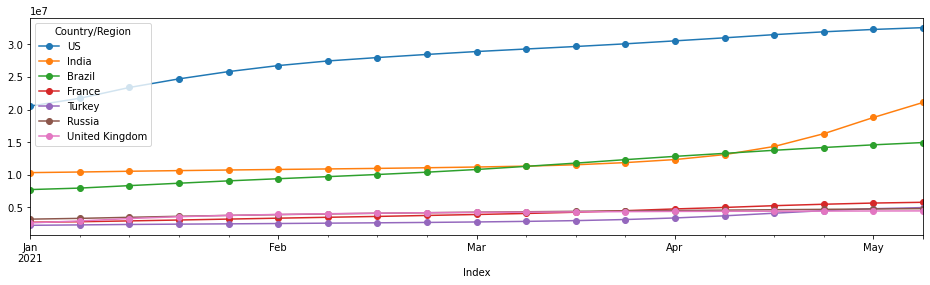

In [78]:
dfc.resample('W').mean().plot(marker = 'o', alpha = 2, figsize = (16,4))

In [79]:
dfr.resample('W').mean().head()

Country/Region,India,Brazil,Turkey,Russia,Italy,Germany
Index,,,,,,
2021-01-03,9.919213e+06,6.884267e+06,2.125909e+06,2.572561e+06,1.491014e+06,1.403902e+06
2021-01-10,1.003339e+07,7.090466e+06,2.172629e+06,2.680990e+06,1.571233e+06,1.511030e+06
2021-01-17,1.016255e+07,7.390415e+06,2.236392e+06,2.851173e+06,1.691886e+06,1.651886e+06
2021-01-24,1.028166e+07,7.687704e+06,2.289763e+06,3.022661e+06,1.826454e+06,1.789700e+06
2021-01-31,1.039150e+07,8.013799e+06,2.339225e+06,3.193093e+06,1.954123e+06,1.905177e+06


<AxesSubplot:xlabel='Index'>

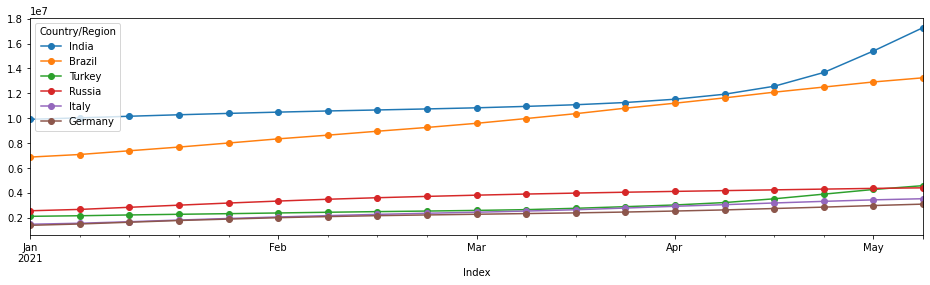

In [80]:
dfr.resample('W').mean().plot(marker = 'o', alpha = 2, figsize  = (16,4))

**For the weekly time frquency, lets find the percentage change/growth in both confirmed and recovered cases for these countries in 2021**

In [81]:
dfc.resample('W').mean().pct_change()

Country/Region,US,India,Brazil,France,Turkey,Russia,United Kingdom
Index,,,,,,,
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-10,0.058375,0.009020,0.029190,0.029012,0.027878,0.037187,0.113726
2021-01-17,0.076392,0.011197,0.047658,0.045506,0.030367,0.049191,0.126392
2021-01-24,0.056464,0.009351,0.044489,0.046928,0.020526,0.045306,0.086471
2021-01-31,0.045208,0.008723,0.041497,0.046909,0.018543,0.037775,0.056688
2021-02-07,0.035715,0.007873,0.036409,0.043784,0.021190,0.032455,0.039553
2021-02-14,0.026548,0.007362,0.034105,0.041105,0.021976,0.027941,0.027749
2021-02-21,0.019004,0.007610,0.033613,0.038159,0.020569,0.024186,0.020807
2021-02-28,0.017127,0.009048,0.035653,0.041101,0.022079,0.020898,0.017250


In [92]:
dfc.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07'],
              dtype='datetime64[ns]', name='Index', length=127, freq=None)

<AxesSubplot:xlabel='Index'>

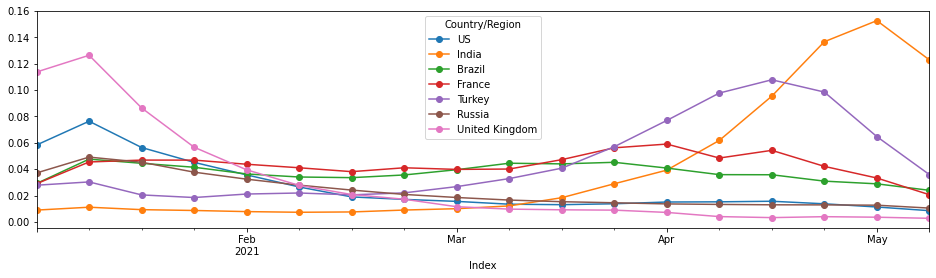

In [82]:
# Here the first line contain nan value, we can bypass this by starting with values from the second row for our plot
dfc.resample('W').mean().pct_change().iloc[1:].plot(marker = 'o', alpha = 2, figsize = (16, 4))


In [83]:
dfr.resample('W').mean().pct_change()

Country/Region,India,Brazil,Turkey,Russia,Italy,Germany
Index,,,,,,
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-10,0.011511,0.029952,0.021977,0.042148,0.053802,0.076308
2021-01-17,0.012873,0.042303,0.029348,0.063478,0.076789,0.093219
2021-01-24,0.011720,0.040226,0.023865,0.060146,0.079537,0.083428
2021-01-31,0.010683,0.042418,0.021602,0.056385,0.069900,0.064523
2021-02-07,0.009832,0.041625,0.024192,0.049642,0.061610,0.057666
2021-02-14,0.008857,0.035510,0.023808,0.043338,0.052086,0.044138
2021-02-21,0.007602,0.036552,0.020793,0.035289,0.046395,0.035889
2021-02-28,0.007821,0.033840,0.018199,0.029334,0.039056,0.026270


<AxesSubplot:xlabel='Index'>

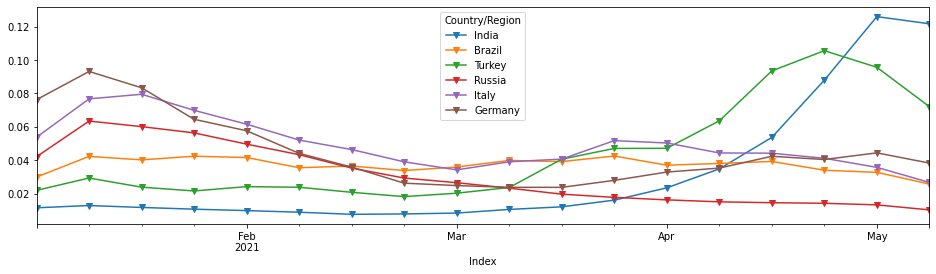

In [84]:
dfr.resample('W').mean().pct_change().iloc[1:].plot(marker = 'v', alpha = 2, figsize = (16,4))

**Lets check the average confirmed cases for every 10days (10D) window within 2021 till date**

In [85]:
dfc.rolling('10D').mean()

Country/Region,US,India,Brazil,France,Turkey,Russia,United Kingdom
Index,,,,,,,
2021-01-01,2.025299e+07,1.028671e+07,7.700578e+06,2.697014e+06,2.220855e+06,3.153960e+06,2.549693e+06
2021-01-02,2.040315e+07,1.030534e+07,7.708492e+06,2.698747e+06,2.226445e+06,3.166929e+06,2.578620e+06
2021-01-03,2.052278e+07,1.031705e+07,7.716910e+06,2.703490e+06,2.231601e+06,3.179200e+06,2.606647e+06
2021-01-04,2.062867e+07,1.032700e+07,7.726120e+06,2.706882e+06,2.237602e+06,3.191090e+06,2.635392e+06
2021-01-05,2.073922e+07,1.033658e+07,7.742976e+06,2.713082e+06,2.244102e+06,3.203014e+06,2.664856e+06
...,...,...,...,...,...,...,...
2021-05-03,3.225759e+07,1.859768e+07,1.454914e+07,5.634667e+06,4.758448e+06,4.738230e+06,4.428395e+06
2021-05-04,3.230437e+07,1.896816e+07,1.460401e+07,5.655355e+06,4.792218e+06,4.746681e+06,4.430473e+06
2021-05-05,3.235240e+07,1.934459e+07,1.466294e+07,5.676197e+06,4.824781e+06,4.755052e+06,4.432593e+06


<AxesSubplot:xlabel='Index'>

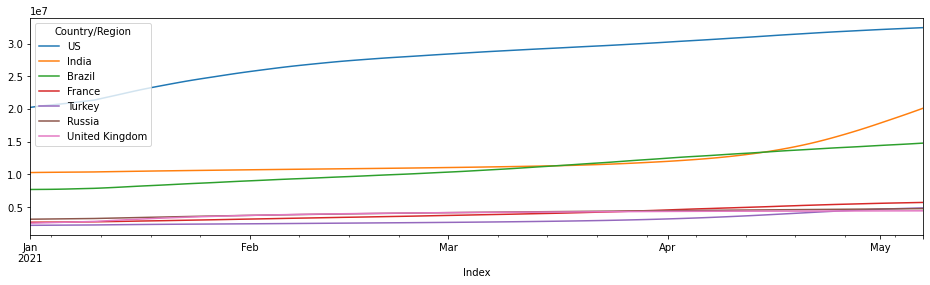

In [86]:
dfc.rolling('10D').mean().plot( alpha = 2, figsize = (16, 4))

In [87]:
dfr.rolling('10D').mean()

Country/Region,India,Brazil,Turkey,Russia,Italy,Germany
Index,,,,,,
2021-01-01,9.883461e+06,6.855372e+06,2.114760e+06,2553467.00,1479988.0,1.388744e+06
2021-01-02,9.905386e+06,6.874314e+06,2.120596e+06,2562873.00,1484571.0,1.394777e+06
2021-01-03,9.919213e+06,6.884267e+06,2.125909e+06,2572561.00,1491014.0,1.403902e+06
2021-01-04,9.933399e+06,6.900711e+06,2.131039e+06,2582654.25,1498287.0,1.414287e+06
2021-01-05,9.946174e+06,6.919538e+06,2.135899e+06,2593171.80,1505855.4,1.425892e+06
...,...,...,...,...,...,...
2021-05-03,1.528167e+07,1.287695e+07,4.257846e+06,4365256.80,3439332.2,2.981519e+06
2021-05-04,1.556831e+07,1.293340e+07,4.311009e+06,4372824.70,3454846.8,2.998752e+06
2021-05-05,1.586595e+07,1.299741e+07,4.362594e+06,4380381.10,3470751.0,3.018845e+06


<AxesSubplot:xlabel='Index'>

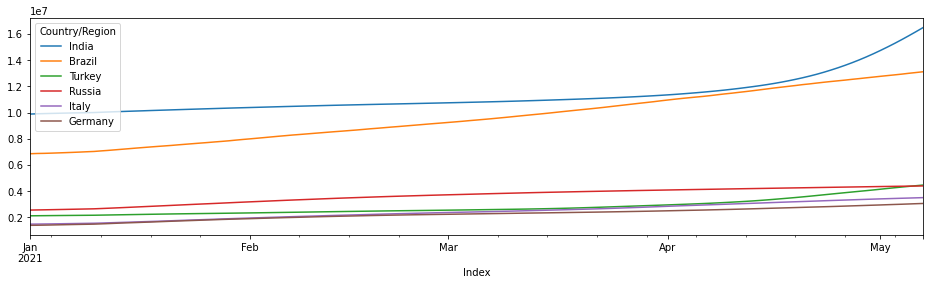

In [88]:
dfr.rolling('10D').mean().plot( alpha = 2, figsize = (16, 4))

**VIELEN DANK .....THANK YOU FOR YOUR TIME**